In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Swiggy dataset.csv")
print(df.tail())

                 name online_order book_table   rate  votes  \
143  Melting Melodies           No         No  3.3/5      0   
144   New Indraprasta           No         No  3.3/5      0   
145      Anna Kuteera          Yes         No  4.0/5    771   
146            Darbar           No         No  3.0/5     98   
147     Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
143                          100          Dining  
144                          150          Dining  
145                          450          Dining  
146                          800          Dining  
147                          200          Dining  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [5]:
def RateHandle(val):
	val=str(val).split('/')
	val=val[0];
	return float(val)

In [6]:
df['rate']=df['rate'].apply(RateHandle)
print(df.tail())

                 name online_order book_table  rate  votes  \
143  Melting Melodies           No         No   3.3      0   
144   New Indraprasta           No         No   3.3      0   
145      Anna Kuteera          Yes         No   4.0    771   
146            Darbar           No         No   3.0     98   
147     Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
143                          100          Dining  
144                          150          Dining  
145                          450          Dining  
146                          800          Dining  
147                          200          Dining  


Text(0.5, 0, 'Restaurant Type')

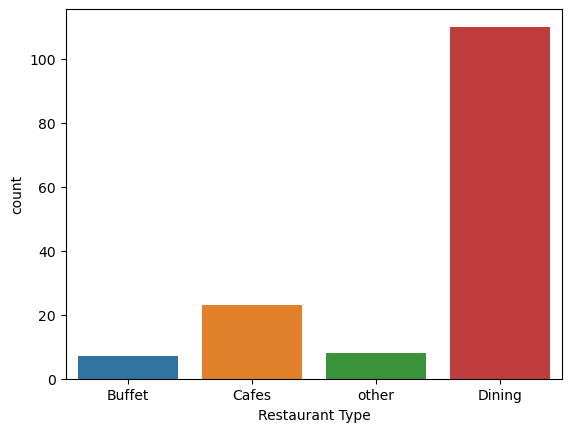

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Restaurant Type")

Text(0, 0.5, 'Votes')

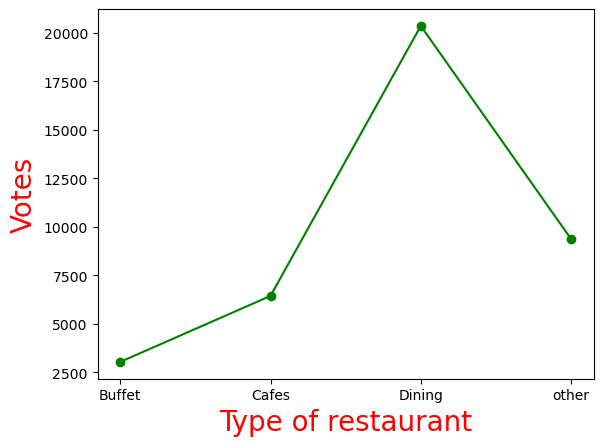

In [10]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

In [11]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

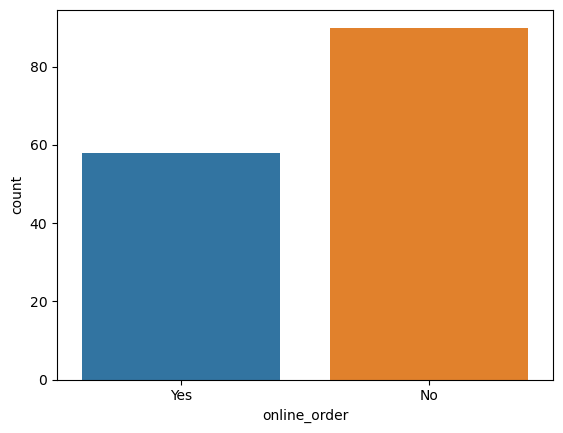

In [13]:
sns.countplot(x=df['online_order'])

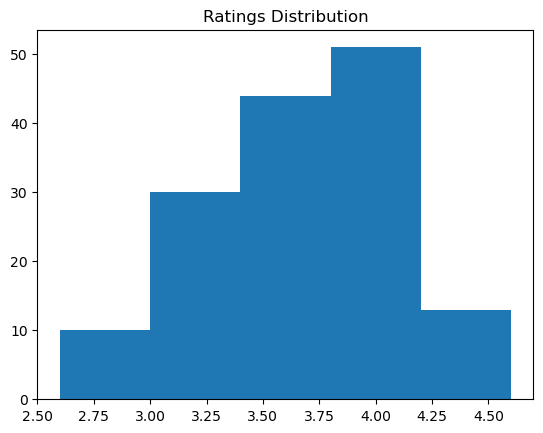

In [14]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

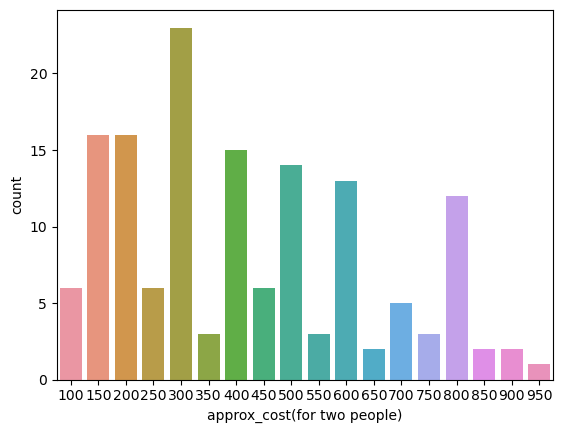

In [19]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

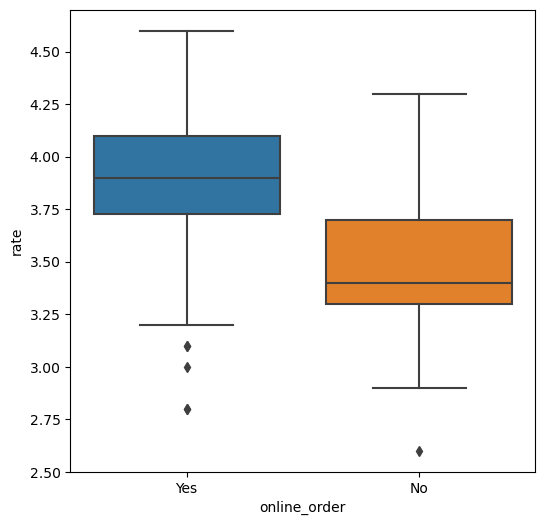

In [20]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

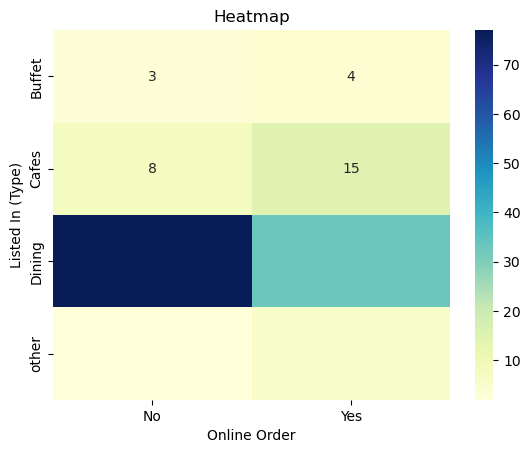

In [21]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()